In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [211]:
# Define column names for the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the training dataset
train_data = pd.read_csv('adult.data', names=columns, na_values=' ?', skipinitialspace=True)

# Load the testing dataset
test_data = pd.read_csv('adult.test', names=columns, na_values=' ?', skipinitialspace=True, skiprows=1) 

# Remove any period in the income column of the testing dataset
test_data.loc[:, 'income'] = test_data['income'].replace(regex=True, to_replace=r'\.', value=r'')

# Combine both datasets
full_dataset = pd.concat([train_data, test_data], ignore_index=True)
full_dataset.reset_index(drop=True, inplace=True)

# Display the combined dataset
full_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [212]:
# Calculate the number of rows in the dataset before preprocessing and print the result
print("Count of records in dataset prior to preprocessing:", len(full_dataset))

Count of records in dataset prior to preprocessing: 48842


In [213]:
# Check for duplicates in the dataset
duplicates_exist = full_dataset.duplicated().any()

# Print the result
if duplicates_exist:
    print("Duplicates exist in the dataset.")
else:
    print("No duplicates found in the dataset.")

Duplicates exist in the dataset.


In [214]:
# Drop duplicates
Data_set_no_duplicates = full_dataset.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [215]:
# Calculate the number of rows in the dataset after removing duplicates and print the result
print("Number of rows in dataset after removing duplicates:", Data_set_no_duplicates.shape[0])

Number of rows in dataset after removing duplicates: 48790


In [216]:
# Use groupby to count the class labels
classCounts = full_dataset.groupby('income').size()

# Display the class counts
print("Class Counts:")
print(classCounts)


Class Counts:
income
<=50K    37155
>50K     11687
dtype: int64


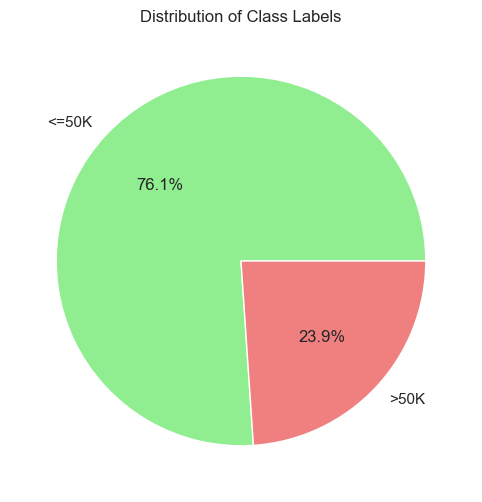

In [217]:
# Count the class labels using a different variable name
label_counts = full_dataset['income'].value_counts()

# Visualize class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Class Labels')
plt.show()

### Finding Null Values

In [218]:
# Find rows containing '?' using a different variable name
question_mark_rows = Data_set_no_duplicates.apply(lambda row: any(cell == '?' for cell in row), axis=1)

# Count the number of rows with '?'
count_question_mark_rows = question_mark_rows.sum()
print("Count of rows containing '?' before dropping:", count_question_mark_rows)

Count of rows containing '?' before dropping: 3615


### Dropping Null Values

In [219]:
# Drop rows with '?' using a different variable name
no_question_mark_df = Data_set_no_duplicates[~question_mark_rows]

# Reset index after dropping rows
no_question_mark_df.reset_index(drop=True, inplace=True)

# Check the number of rows after dropping '?'
print("Number of rows in dataset after dropping rows with '?':", len(no_question_mark_df))

no_question_mark_df

Number of rows in dataset after dropping rows with '?': 45175


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45171,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45172,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45173,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Summary of the dataset

In [220]:
no_question_mark_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [221]:
# Print a summary of the dataset
print("Dataset Summary:")

# Print the statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:")
no_question_mark_df.describe()

Dataset Summary:

Statistical Summary of Numerical Features:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [222]:
# Print a summary of categorical features
print("\nSummary of Categorical Features:")
categorical_summary = no_question_mark_df.describe(include=['object'])
categorical_summary


Summary of Categorical Features:


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


### Box plot for numerical features

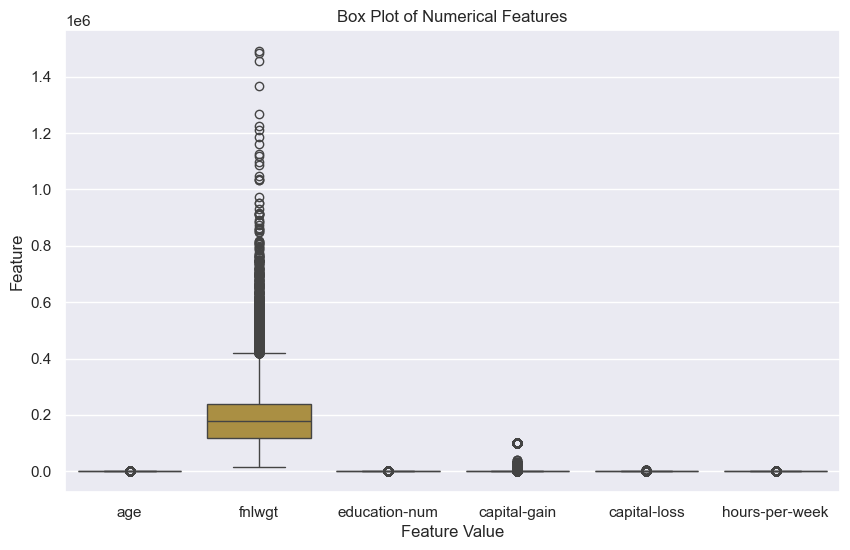

In [223]:
# Set the seaborn style to "darkgrid"
sns.set(style="darkgrid")

# Plot horizontal box plots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=no_question_mark_df, orient="v", palette="husl")
plt.title("Box Plot of Numerical Features")
plt.ylabel("Feature")
plt.xlabel("Feature Value")
plt.show()

### Plotting numerical features against income

C:\Users\damik\AppData\Local\Temp\ipykernel_15396\3745981498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=filtered_dataset, palette="Set3")


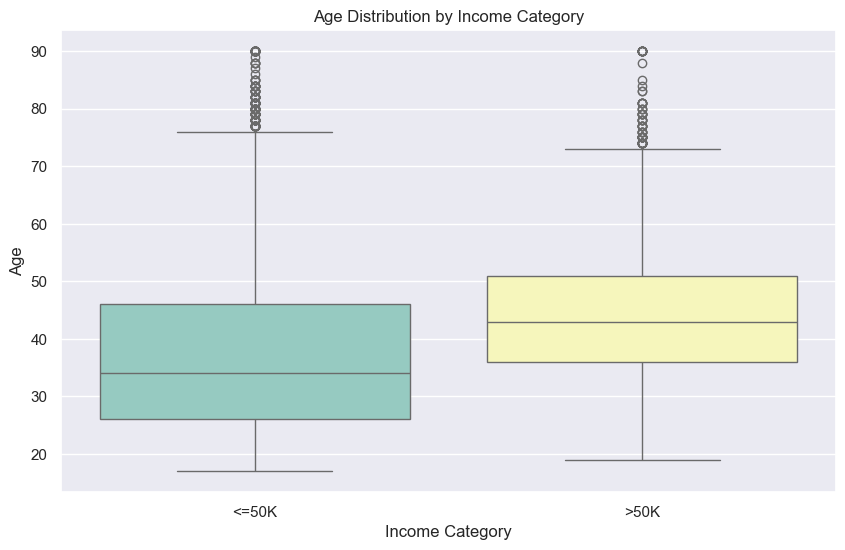

In [224]:
# Define the income categories
income_groups = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_groups)]

# Create a box plot to compare age distribution between income groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=filtered_dataset, palette="Set3")
plt.title('Age Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age')
plt.show()

C:\Users\damik\AppData\Local\Temp\ipykernel_15396\1588491419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='fnlwgt', data=filtered_dataset, palette="Set2")


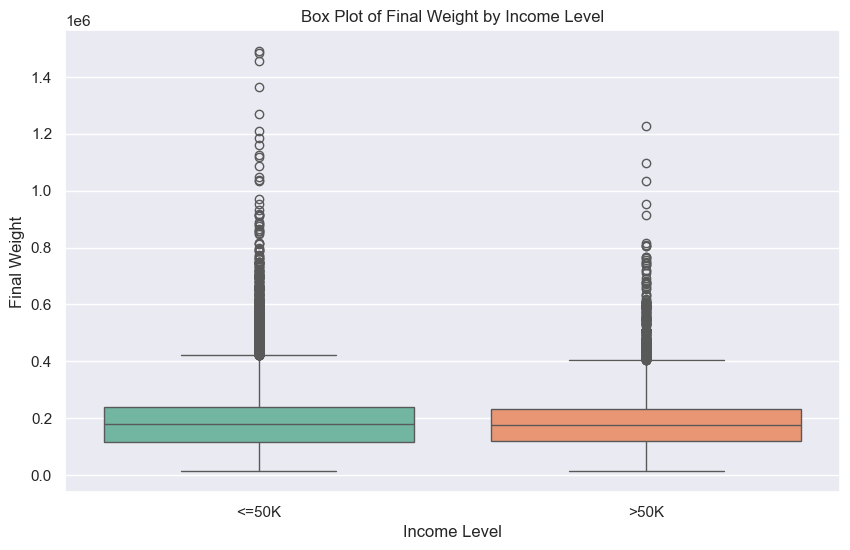

In [225]:
# Define the income categories
income_levels = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_levels)]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='fnlwgt', data=filtered_dataset, palette="Set2")
plt.title('Box Plot of Final Weight by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Final Weight')
plt.show()

C:\Users\damik\AppData\Local\Temp\ipykernel_15396\2683489612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='education-num', data=filtered_dataset, palette="Set1")


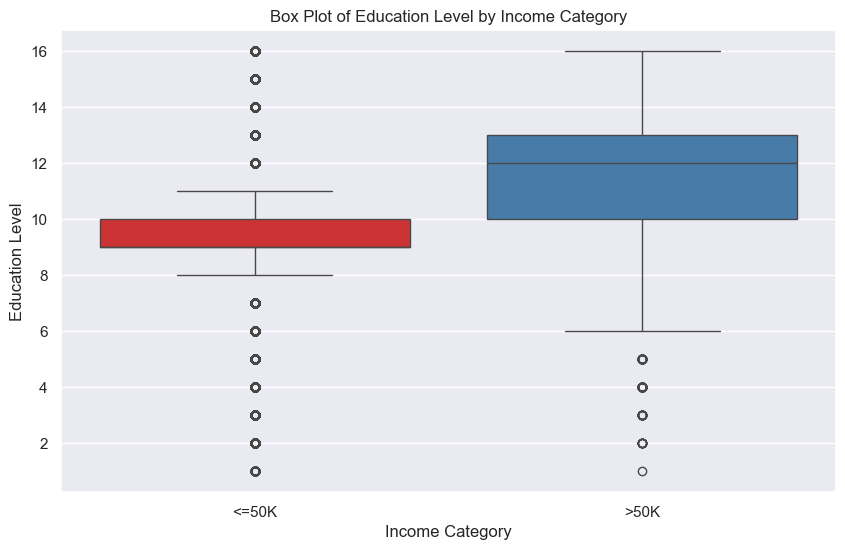

In [226]:
# Define the income categories
income_levels = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_levels)]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=filtered_dataset, palette="Set1")
plt.title('Box Plot of Education Level by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Education Level')
plt.show()


C:\Users\damik\AppData\Local\Temp\ipykernel_15396\1546381314.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='capital-gain', data=filtered_dataset, palette="Set2")


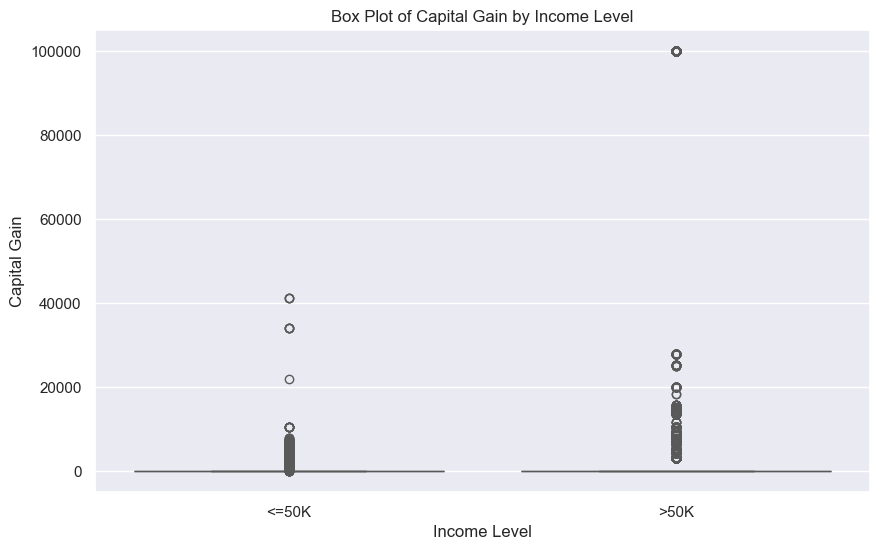

In [227]:
# Define the income categories
income_levels = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_levels)]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-gain', data=filtered_dataset, palette="Set2")
plt.title('Box Plot of Capital Gain by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Gain')
plt.show()


C:\Users\damik\AppData\Local\Temp\ipykernel_15396\1087036981.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='capital-loss', data=filtered_dataset, palette="Set3")


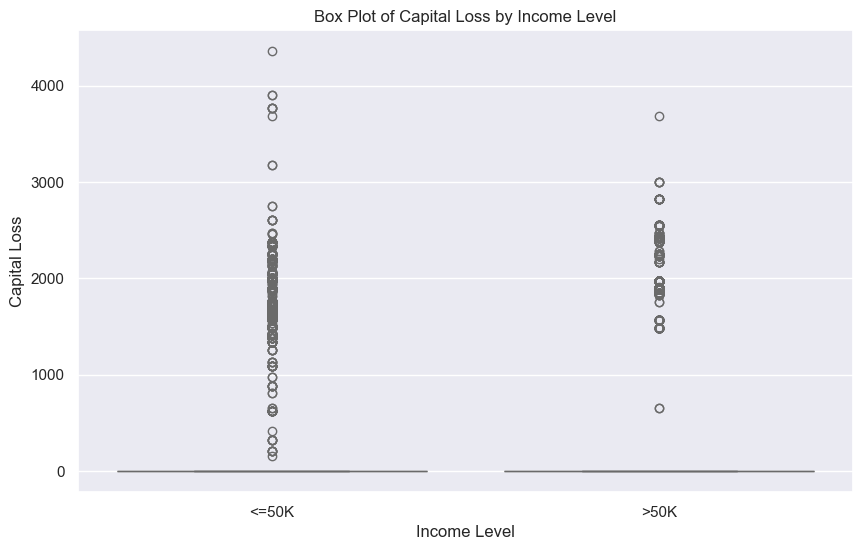

In [228]:
# Define the income categories
income_levels = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_levels)]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-loss', data=filtered_dataset, palette="Set3")
plt.title('Box Plot of Capital Loss by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Loss')
plt.show()

C:\Users\damik\AppData\Local\Temp\ipykernel_15396\1982610392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=filtered_dataset, palette="Set1")


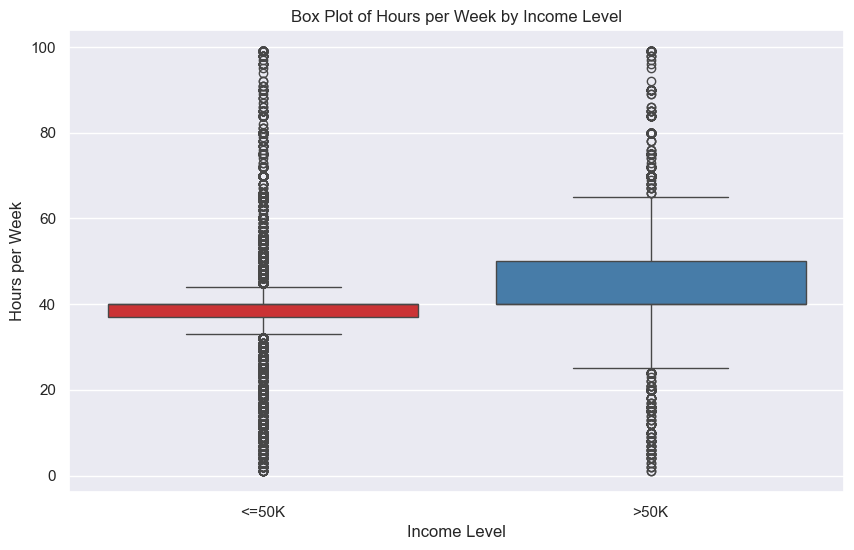

In [229]:
# Define the income categories
income_levels = ['<=50K', '>50K']

# Filter the dataset based on income categories
filtered_dataset = no_question_mark_df[no_question_mark_df['income'].isin(income_levels)]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=filtered_dataset, palette="Set1")
plt.title('Box Plot of Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.show()

### Bar plot for numerical features against income

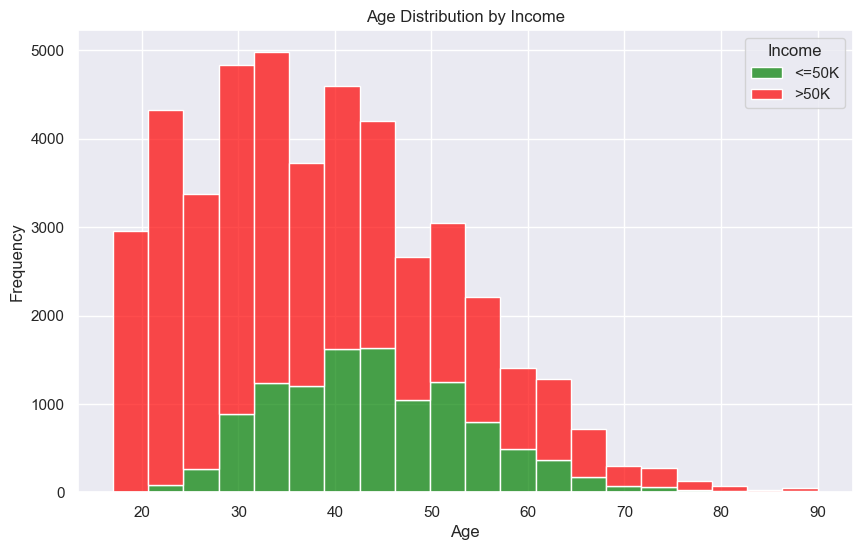

In [230]:
# Set the style of the plots to "whitegrid"
sns.set(style="darkgrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='age', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

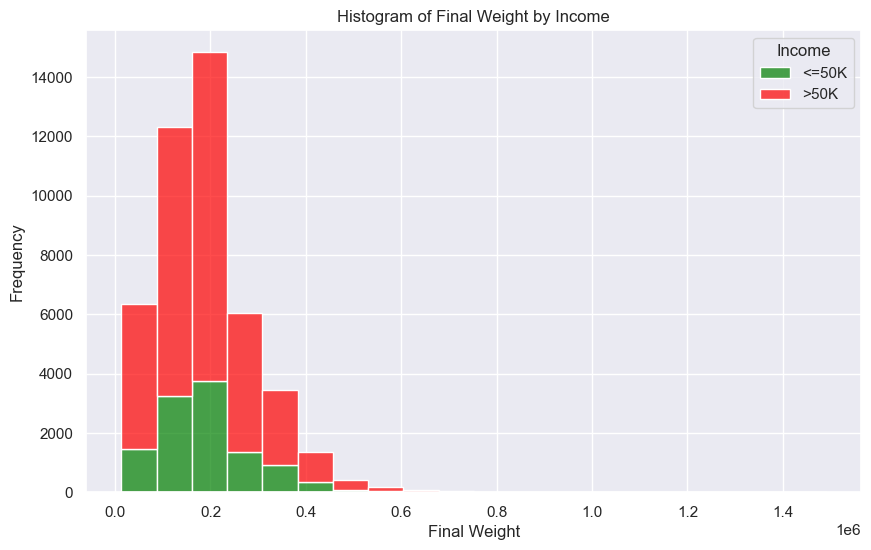

In [231]:
# Set the style of the plots
sns.set(style="darkgrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='fnlwgt', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Histogram of Final Weight by Income')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

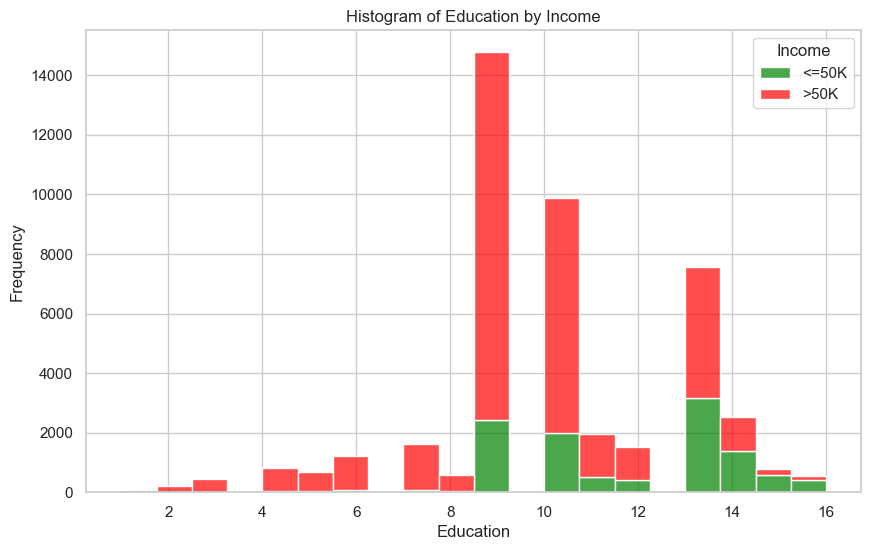

In [232]:
# Set the style of the plots
sns.set(style="whitegrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='education-num', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Histogram of Education by Income')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

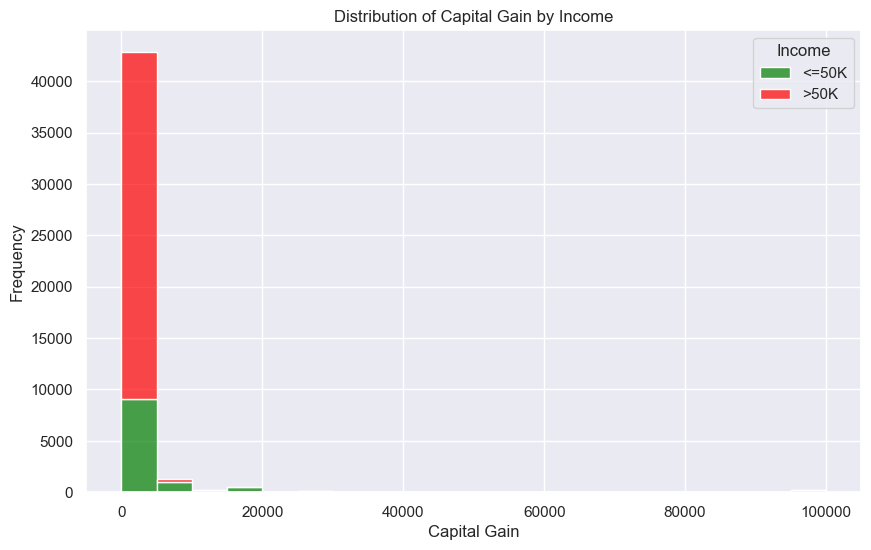

In [233]:
# Set the style of the plots to "darkgrid"
sns.set(style="darkgrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='capital-gain', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Distribution of Capital Gain by Income')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

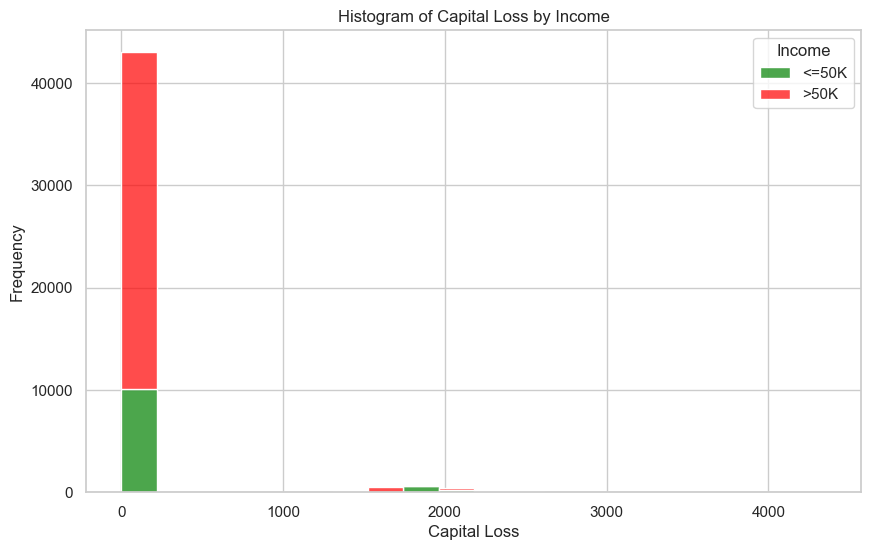

In [234]:
# Set the style of the plots to "whitegrid"
sns.set(style="whitegrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='capital-loss', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Histogram of Capital Loss by Income')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

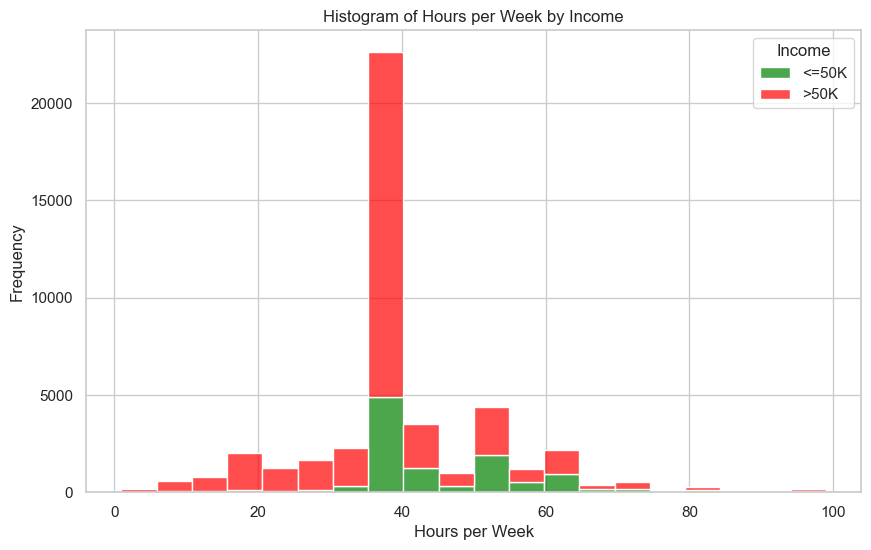

In [235]:
# Set the style of the plots to "whitegrid"
sns.set(style="whitegrid")

# Define colors for income groups
under_50K_color = 'red'
over_50K_color = 'green'

plt.figure(figsize=(10, 6))
sns.histplot(data=no_question_mark_df, x='hours-per-week', hue='income', bins=20, palette={'>50K': over_50K_color, '<=50K': under_50K_color}, alpha=0.7, multiple='stack')
plt.title('Histogram of Hours per Week by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

### Kernel density plot for numeric features

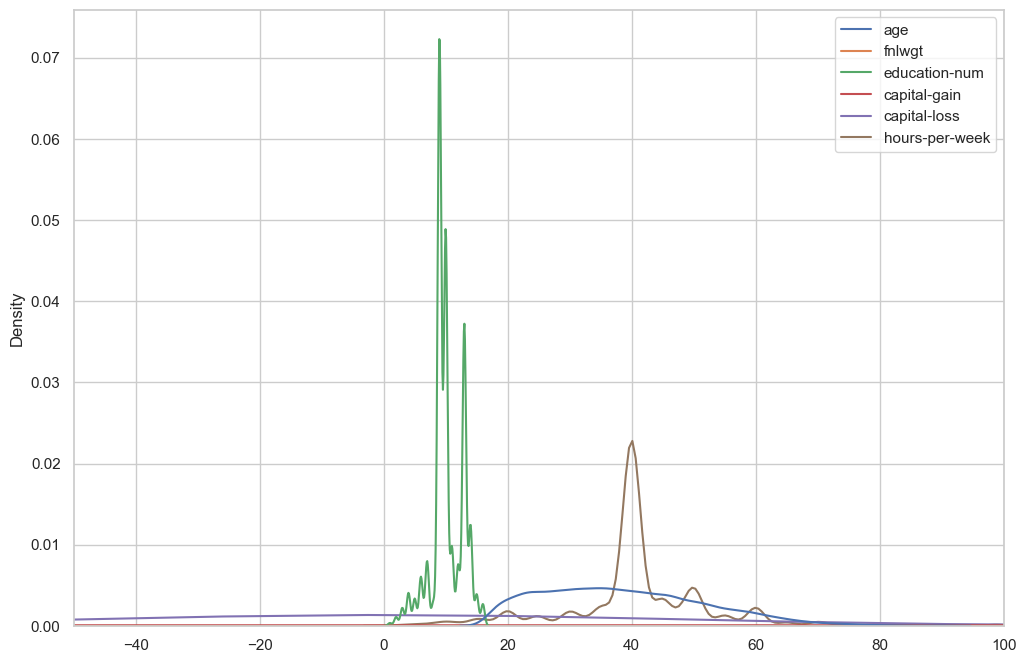

In [236]:
# Create subplots with specified figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot kernel density estimate (KDE) plot
sns.kdeplot(data=no_question_mark_df, ax=ax)

# Set the x-axis limits
ax.set_xlim(-50, 100)

# Show the plot
plt.show()

### Standard deviation and mean before standard scalar

Standard Deviation of each numeric column:
age                   13.215349
fnlwgt            105652.436515
education-num          2.551740
capital-gain        7510.249876
capital-loss         405.156611
hours-per-week        12.007730
dtype: float64


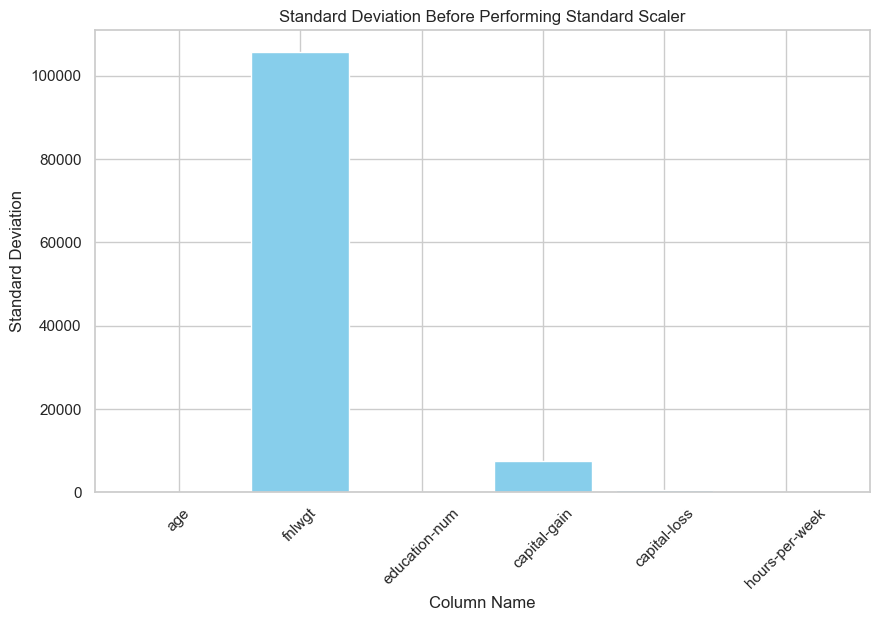

In [237]:
# Select only numeric columns
numeric_columns = no_question_mark_df.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

# Plot the standard deviation for each numeric column
plt.figure(figsize=(10, 6))
plt.bar(std_deviation_numeric.index, std_deviation_numeric.values, color='skyblue')
plt.title("Standard Deviation Before Performing Standard Scaler")
plt.xlabel("Column Name")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=45)
plt.show()

Mean of each numeric column:
age                   38.556170
fnlwgt            189738.798450
education-num         10.119314
capital-gain        1102.576270
capital-loss          88.687593
hours-per-week        40.942512
dtype: float64


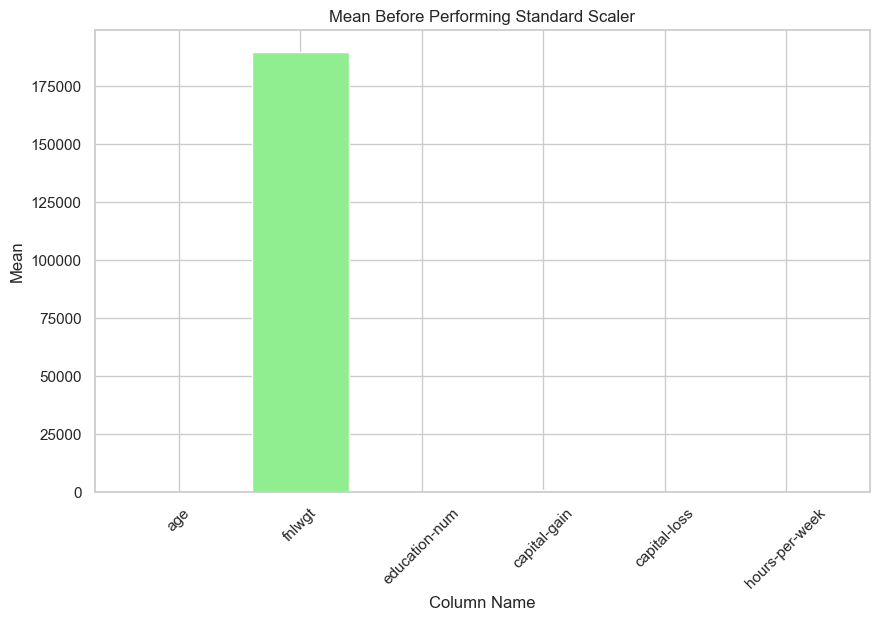

In [238]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean for each numeric column
plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values, color='lightgreen')
plt.title("Mean Before Performing Standard Scaler")
plt.xlabel("Column Name")
plt.ylabel("Mean")
plt.xticks(rotation=45)
plt.show()

In [239]:
# Initialize the StandardScaler
scaler_instance = StandardScaler()

# Fit and transform the numeric columns using StandardScaler
scaled_data = scaler_instance.fit_transform(numeric_columns)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Reset index of no_null_df2
no_question_mark_df.reset_index(drop=True, inplace=True)

# Concatenate the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, no_question_mark_df.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)], axis=1)

# Display the dataset after standard scaling
print("Dataset after standard scaling:")
final_scaled_data


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.420438,0.525050,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
45171,0.033585,0.243066,1.128923,-0.146811,-0.218899,-0.411615,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
45172,-0.042086,1.753355,1.128923,-0.146811,-0.218899,0.754313,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
45173,0.411937,-1.001860,1.128923,0.579538,-0.218899,-0.078493,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


### Mean and standard deviation after standard scalar

In [240]:
# Selecting numerical columns for which we want to calculate mean and standard deviation
selected_numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate mean and standard deviation of each feature in the scaled numerical columns
mean_values = final_scaled_data[selected_numerical_columns].mean()
std_values = final_scaled_data[selected_numerical_columns].std()

# Display mean and standard deviation of each feature
print("Mean values of each feature after standard scaling:")
print(mean_values)
print("\nStandard deviation of each feature after standard scaling:")
print(std_values)

Mean values of each feature after standard scaling:
age               1.509952e-17
fnlwgt           -1.410862e-16
education-num    -2.878347e-17
capital-gain     -5.347748e-18
capital-loss      1.132464e-17
hours-per-week   -9.201273e-17
dtype: float64

Standard deviation of each feature after standard scaling:
age               1.000011
fnlwgt            1.000011
education-num     1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
dtype: float64


### Mean after standard scalar

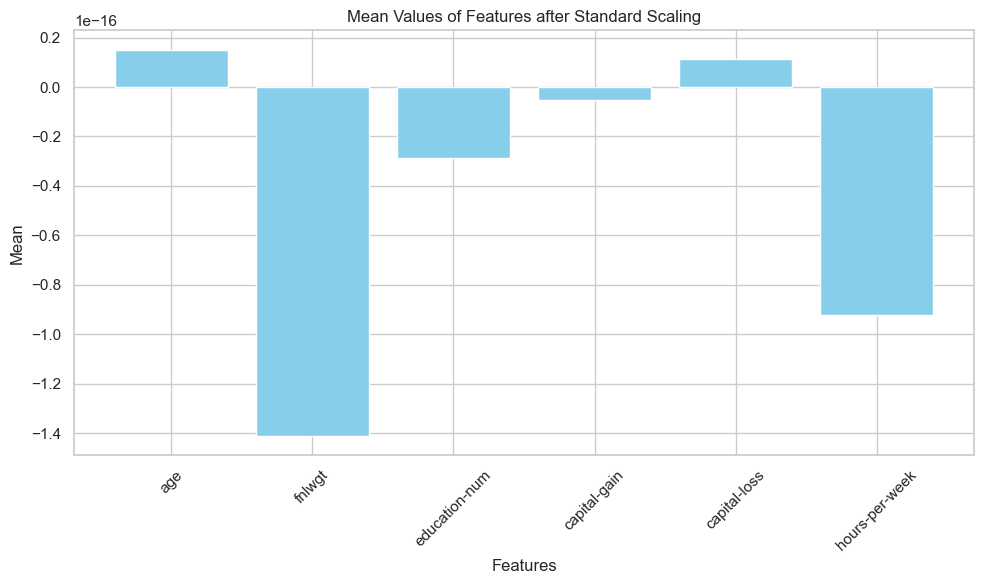

In [241]:
# Plotting mean values
plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values, color='skyblue')
plt.title('Mean Values of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Standard deviation after standard scalar

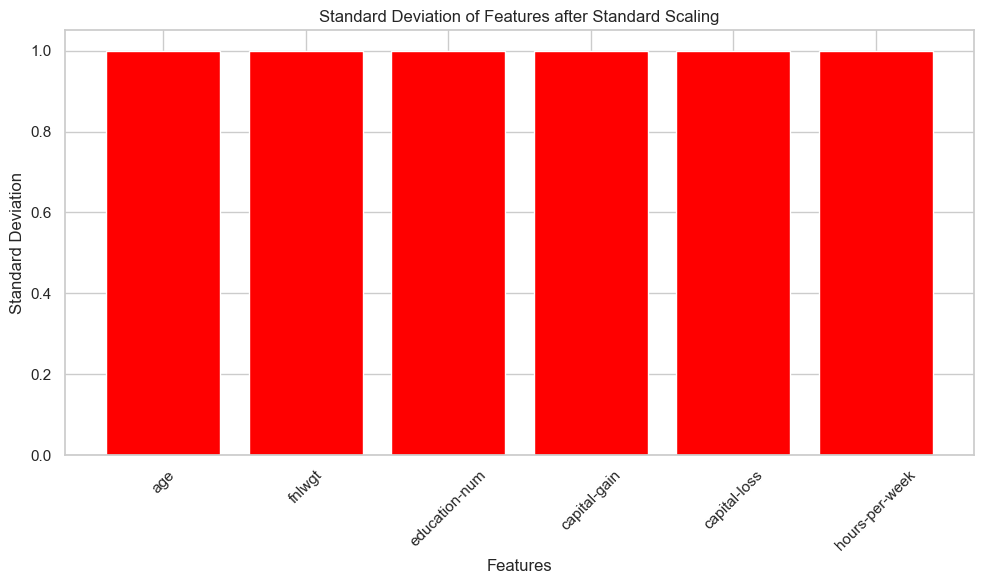

In [242]:
# Plotting standard deviation values
plt.figure(figsize=(10, 6))
plt.bar(std_values.index, std_values.values, color='red')
plt.title('Standard Deviation of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation matrix

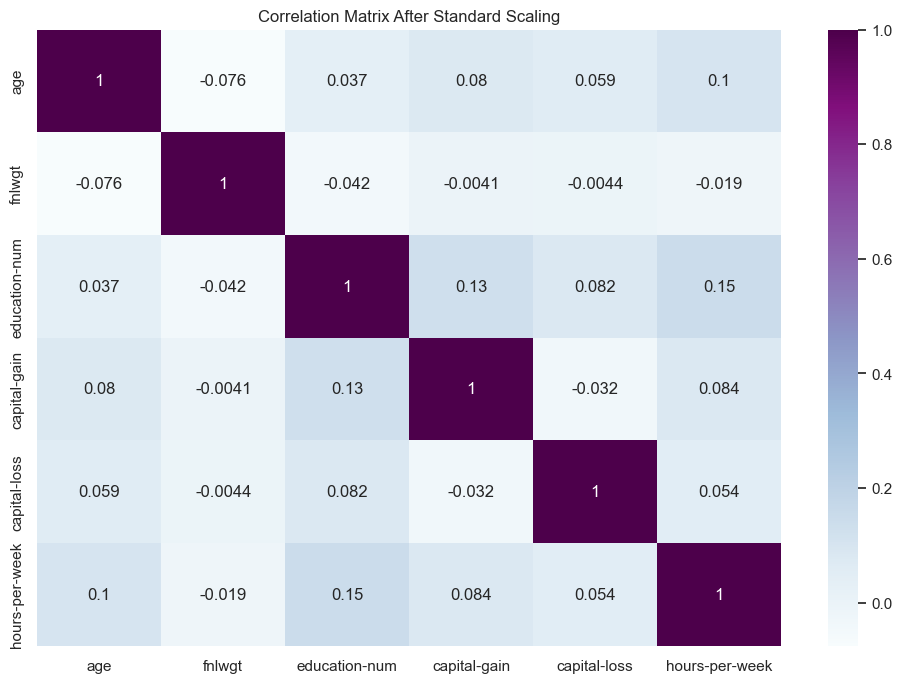

In [243]:
# Selecting only numeric columns
numeric_data = final_scaled_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr(method='pearson')

# Display correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title("Correlation Matrix After Standard Scaling")
plt.show()


### Encoding categorical features

In [244]:
# Identify the features (X) and target variable (y)
X = final_scaled_data.drop('income', axis=1)
y = final_scaled_data['income']

# Define categorical columns
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Perform one-hot encoding on categorical features
encoded_categorical = pd.get_dummies(X[cat_cols], drop_first=True)

# Concatenate one-hot encoded features with the original DataFrame
X_encoded = pd.concat([X.drop(cat_cols, axis=1), encoded_categorical], axis=1)


# Building predictive model using Random Forest

### Split into train and test 

In [245]:
# Split the data into training and testing sets
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTEENN for combined over- and under-sampling
smote_enn_sampler = SMOTEENN(random_state=42)
new_X_Training, new_Y_Training = smote_enn_sampler.fit_resample(X_train_data, y_train_labels)

# Display the shapes of the training and testing sets
print("Shape of X_train_resampled:", new_X_Training.shape)
print("Shape of X_test_data:", X_test_data.shape)
print("Shape of y_train_resampled:", new_Y_Training.shape)
print("Shape of y_test_labels:", y_test_labels.shape)

Shape of X_train_resampled: (40381, 96)
Shape of X_test_data: (9035, 96)
Shape of y_train_resampled: (40381,)
Shape of y_test_labels: (9035,)


### Fit the classifier into training set

In [246]:
# Initialize the Gaussian Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Fit the classifier to the resampled training set
nb_classifier.fit(new_X_Training, new_Y_Training)

GaussianNB()

In [247]:
# Predict on the test set
model_pred = nb_classifier.predict(X_test_data)

### Classification report

In [248]:
# Generate classification report
report = classification_report(y_test_labels, model_pred)

# Print classification report
print('\nClassification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.94      0.51      0.67      6830
        >50K       0.37      0.90      0.53      2205

    accuracy                           0.61      9035
   macro avg       0.66      0.71      0.60      9035
weighted avg       0.80      0.61      0.63      9035



### Accuracy on the test set

In [249]:
# Predict on the test set
test_predictions = nb_classifier.predict(X_test_data)

# Calculate accuracy score
test_accuracy = accuracy_score(y_test_labels, test_predictions)

# Convert accuracy score to percentage with two decimal places
accuracy_percentage = "{:.2f}".format(test_accuracy * 100)

print("Accuracy on the test set:", accuracy_percentage, "%")

Accuracy on the test set: 60.83 %


In [250]:
# Predict on the resampled training set
train_predictions = nb_classifier.predict(new_X_Training)

# Calculate accuracy score for the training set
train_accuracy = accuracy_score(new_Y_Training, train_predictions)

# Convert accuracy score to percentage with two decimal places
train_accuracy_percentage = "{:.2f}".format(train_accuracy * 100)

print("Accuracy on the training set:", train_accuracy_percentage, "%")

Accuracy on the training set: 81.49 %


### Confusion Matrix

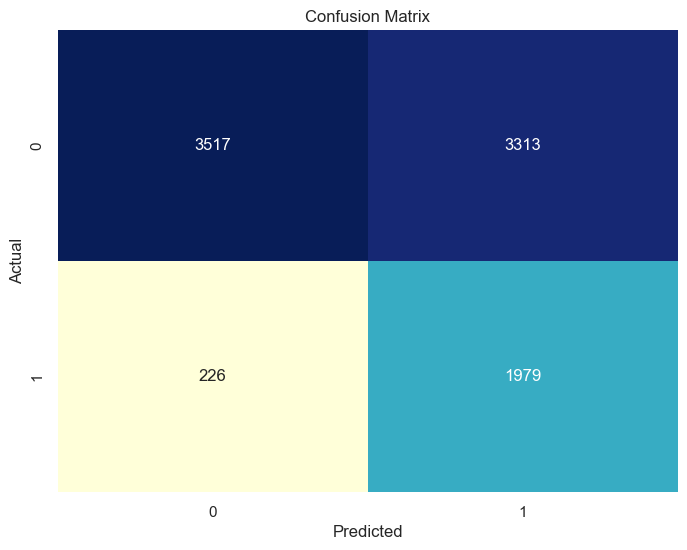

In [251]:
# Calculate the confusion matrix on the test set
test_conf_matrix = confusion_matrix(y_test_labels, test_predictions)

# Create a heatmap for the confusion matrix with changed colors
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [252]:
# Identify the features (X) and target variable (y)
features = final_scaled_data.drop('income', axis=1)
target = final_scaled_data['income']

# One-hot encode categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoded_categorical = pd.get_dummies(features[categorical_cols], drop_first=True)

# Concatenate one-hot encoded features with the numeric features
encoded_features = pd.concat([features.drop(categorical_cols, axis=1), encoded_categorical], axis=1)

# Split the data into training and testing sets
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Define the pipeline
classifier_pipeline = Pipeline([
    ('sampling', SMOTEENN(random_state=42)),  # Over- and undersampling
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))  # Classifier
])

# Fit the pipeline on the training data
classifier_pipeline.fit(X_train_data, y_train_labels)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train_data.shape)
print("Shape of X_test:", X_test_data.shape)
print("Shape of y_train:", y_train_labels.shape)
print("Shape of y_test:", y_test_labels.shape)

Shape of X_train: (36140, 96)
Shape of X_test: (9035, 96)
Shape of y_train: (36140,)
Shape of y_test: (9035,)


In [253]:
# Evaluate the classifier pipeline on the training set
train_accuracy = classifier_pipeline.score(X_train_data, y_train_labels)

# Format the accuracy to two decimal places and as a percentage
formatted_train_accuracy = "{:.2f}%".format(train_accuracy * 100)

print("Accuracy on the training set:", formatted_train_accuracy)

Accuracy on the training set: 84.98%


In [254]:
# Evaluate the classifier pipeline on the training set
train_accuracy = classifier_pipeline.score(X_test_data, y_test_labels)

# Format the accuracy to two decimal places and as a percentage
formatted_train_accuracy = "{:.2f}%".format(train_accuracy * 100)

print("Accuracy on the test set:", formatted_train_accuracy)

Accuracy on the test set: 80.76%


### Plotting the ROC Curve

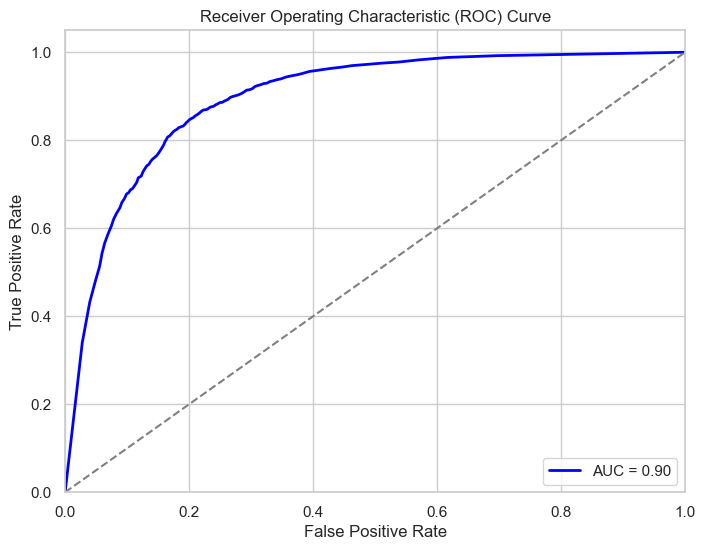

In [255]:
# Encode target variable into binary format
target_label_encoder = LabelEncoder()
binary_target_test = target_label_encoder.fit_transform(y_test_labels)

# Predict probabilities on the test set using the classifier pipeline
test_probabilities = classifier_pipeline.predict_proba(X_test_data)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(binary_target_test, test_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(binary_target_test, test_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [256]:
roc_auc

0.8958781619040979

### Classification report

In [257]:
# Make predictions on the test set
y_test_pred = classifier_pipeline.predict(X_test_data)

# Generate the classification report
classification_rep = classification_report(y_test_labels, y_test_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      6830
        >50K       0.57      0.85      0.68      2205

    accuracy                           0.81      9035
   macro avg       0.76      0.82      0.77      9035
weighted avg       0.85      0.81      0.82      9035



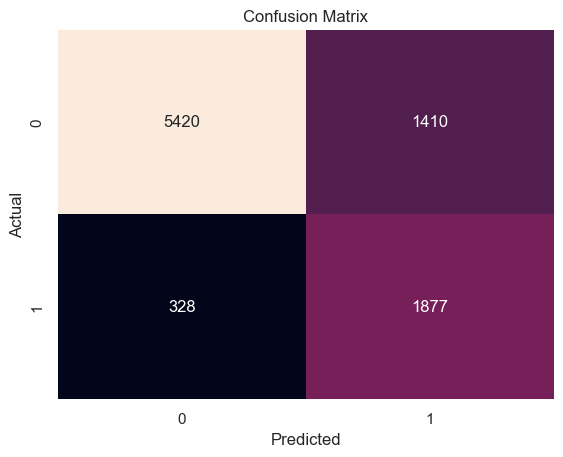

In [259]:
# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test_labels, y_test_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()